In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from geopy import distance
import math
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
#read the dataset
anz=pd.read_csv("ANZ_transaction.csv")
#enable all columns 
pd.options.display.max_columns = None
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,1/08/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,1/08/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,1/08/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,1/08/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,1/08/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
anz.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,31/10/2018,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,31/10/2018,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,31/10/2018,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,31/10/2018,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,5517.91,31/10/2018,M,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [4]:
#check data type and non-null values

anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
#describe unique values of each column
for i in anz:
    print(f"'{i}' has {anz[i].nunique()} unique data values")

'status' has 2 unique data values
'card_present_flag' has 2 unique data values
'bpay_biller_code' has 3 unique data values
'account' has 100 unique data values
'currency' has 1 unique data values
'long_lat' has 100 unique data values
'txn_description' has 6 unique data values
'merchant_id' has 5725 unique data values
'merchant_code' has 1 unique data values
'first_name' has 80 unique data values
'balance' has 12006 unique data values
'date' has 91 unique data values
'gender' has 2 unique data values
'age' has 33 unique data values
'merchant_suburb' has 1609 unique data values
'merchant_state' has 8 unique data values
'extraction' has 9442 unique data values
'amount' has 4457 unique data values
'transaction_id' has 12043 unique data values
'country' has 1 unique data values
'customer_id' has 100 unique data values
'merchant_long_lat' has 2703 unique data values
'movement' has 2 unique data values


In [6]:
#convert "date" and "extraction" columns to datetime format
anz["date"]=pd.to_datetime(anz["date"],format="%d/%m/%Y")
anz["extraction"]=pd.to_datetime(anz["extraction"],format="%Y-%m-%dT%H:%M:%S.000+0000")

In [7]:
#create a new variable with the month-year of date column
anz["month_year"]=pd.to_datetime(anz["date"]).dt.to_period("M")

In [8]:
#find missing value data in "date" column
print(pd.date_range(start = min(anz["date"]), end = max(anz["date"]) ).difference(anz["date"]))

#calculate the min and max date values of the dataset
print(min(anz["date"]))
print(max(anz["date"]))

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)
2018-08-01 00:00:00
2018-10-31 00:00:00


In [9]:
#create new columns "hour" and "week" to analyse the transactions in these variables
anz["hour"]=anz["extraction"].dt.hour
anz["week"]=anz["extraction"].dt.dayofweek

In [10]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [11]:
#split the latitute and longitude in the variables "long_lat" and "merchant_long_lat"
l_lat=anz["long_lat"].str.split(expand=True).astype(float)
l_lat=l_lat.rename(columns={0:"c_long",1:"c_lat"})
m_lat=anz["merchant_long_lat"].str.split(expand=True).astype(float)
m_lat=m_lat.rename(columns={0:"m_long",1:"m_lat"})
print(l_lat)
print(m_lat)

       c_long  c_lat
0      153.41 -27.95
1      153.41 -27.95
2      151.23 -33.94
3      153.10 -27.66
4      153.41 -27.95
...       ...    ...
12038  149.83 -29.47
12039  151.22 -33.87
12040  151.12 -33.89
12041  144.96 -37.76
12042  150.92 -33.77

[12043 rows x 2 columns]
       m_long  m_lat
0      153.38 -27.99
1      151.21 -33.87
2      151.21 -33.87
3      153.05 -26.68
4      153.44 -28.06
...       ...    ...
12038  145.23 -37.81
12039  150.88 -33.96
12040  150.92 -33.74
12041  145.09 -37.91
12042  151.19 -33.93

[12043 rows x 2 columns]


In [12]:
#concat these values with the original dataset anz
anz=pd.concat([anz,l_lat,m_lat],axis=1,join="inner")

In [13]:
print(anz.info())
print(anz.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [14]:
#find customers outside Australia
outside_aus=anz[(anz["c_long"]>154) | (anz["c_long"]<112) | (anz["c_lat"]>-10) | (anz["c_lat"]<-44)]
outside_aus["customer_id"].value_counts()
#customer outside Australia: CUS-1617121891

CUS-1617121891    123
Name: customer_id, dtype: int64

In [15]:
#describe the statistics of the variable "amount"
anz["amount"].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [16]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [17]:
#create a new data frame as anz_merch which contains only transactions
anz_merch=anz[anz["merchant_id"].isnull()==False]
anz_merch["txn_description"].value_counts()

SALES-POS    3934
POS          3783
Name: txn_description, dtype: int64

Purchase transaction statistics

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

Overall transaction statistics

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64


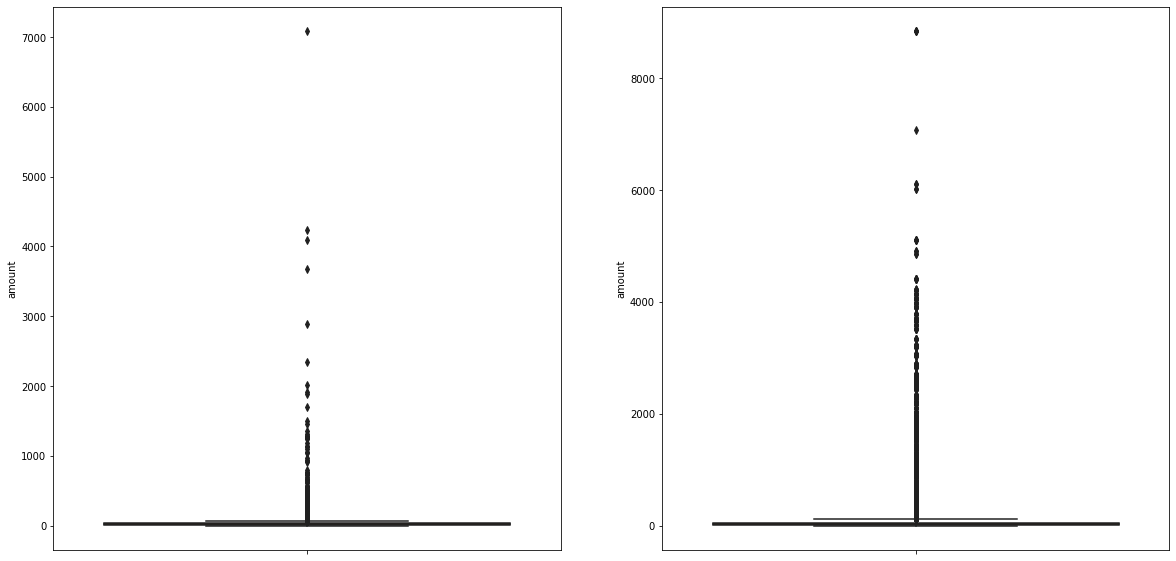

In [18]:
print("Purchase transaction statistics\n")
print(anz_merch["amount"].describe())
print("\nOverall transaction statistics\n")
print(anz["amount"].describe())

#create a boxplot to understand the behaviour of these categorical variables
fig, ax = plt.subplots(1,2,figsize=(20,10)) 
sns.boxplot(y="amount",data=anz_merch,palette=sns.color_palette("BrBG", 30),ax=ax[0])
sns.boxplot(y="amount",data=anz,palette=sns.color_palette("BrBG", 30),ax=ax[1])


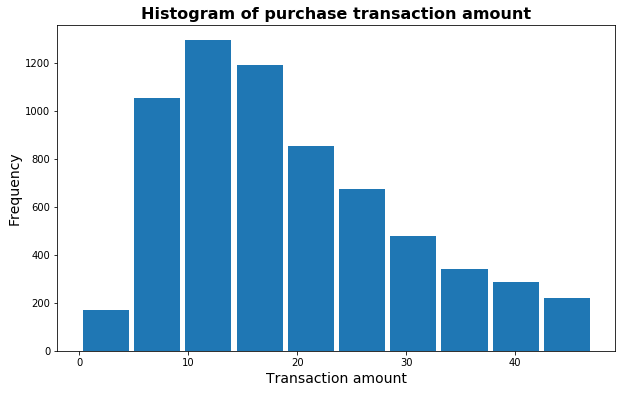

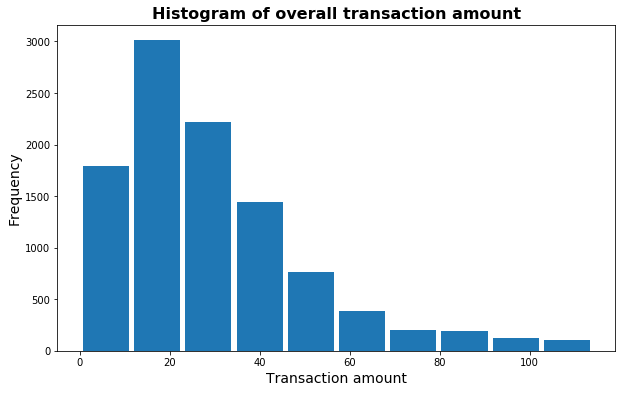

count    1158.000000
mean      158.077789
std       364.302928
min        47.120000
25%        56.910000
50%        76.225000
75%       123.792500
max      7081.090000
Name: amount, dtype: float64
count    1807.000000
mean     1084.407476
std      1180.246113
min       114.110000
25%       167.000000
50%       761.330000
75%      1630.360000
max      8835.980000
Name: amount, dtype: float64


In [19]:
#create a series with only the "amount" variable
hist_amount=anz_merch["amount"]
#create a copy of the hist_amount series of the quantile between 0.85 and 1
hist_amount2=hist_amount[hist_amount.between(hist_amount.quantile(.85),hist_amount.quantile(1))]
#filter the data in the quantile between 0 and 0.85
hist_amount=hist_amount[hist_amount.between(hist_amount.quantile(0),hist_amount.quantile(.85))]

#plot a histogram with the purchase transaction amount, without outliers (<0.85)
plt.figure(figsize=(10,6))
plt.hist(hist_amount,rwidth =0.9)
plt.title("Histogram of purchase transaction amount",fontsize=16, fontweight='bold')
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Transaction amount",fontsize=14)



#extract the variable "amount" of the original dataset
amount_over=anz["amount"]
#create a data series between quantile 0.85 and 1
amount_over2=amount_over[amount_over.between(amount_over.quantile(0.85),amount_over.quantile(1))]
#filter the data series between quantile 0 and 0.85
amount_over=amount_over[amount_over.between(amount_over.quantile(0),amount_over.quantile(.85))]

#plot a histogram with overall transaction amount, without outliers (0.85)
plt.figure(figsize=(10,6))
plt.hist(amount_over,rwidth =0.9)
plt.title("Histogram of overall transaction amount",fontsize=16, fontweight='bold')
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Transaction amount",fontsize=14)

plt.show()

#describe the statistic of the quantiles 0.85 and 1 to understand the disparity of the outliers
print(hist_amount2.describe())
print(amount_over2.describe())

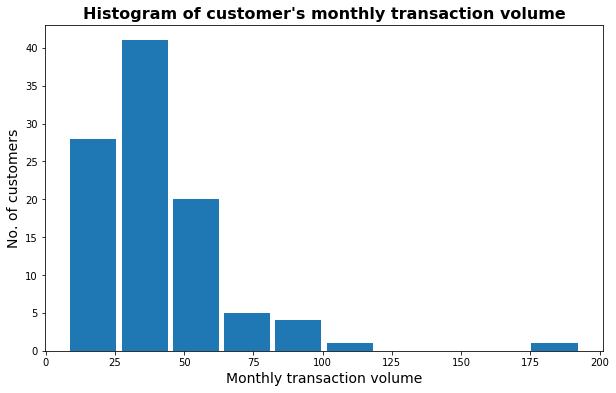

In [20]:
#calculate the averge transaction per month of each customer
cust=round(anz["customer_id"].value_counts()/3,0)

#plot a histogram with the monthly transaction volume
plt.figure(figsize=(10,6))
plt.hist(cust,rwidth =0.9)
plt.title("Histogram of customer's monthly transaction volume",fontsize=16, fontweight='bold')
plt.ylabel("No. of customers",fontsize=14)
plt.xlabel("Monthly transaction volume",fontsize=14)


plt.show()

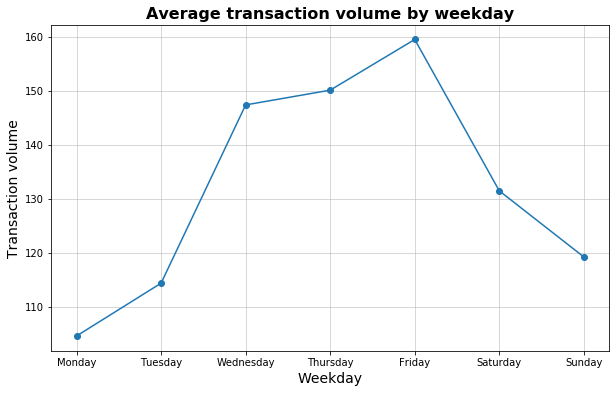

In [21]:
#create a copy of the dataset
vol_week=anz.copy()
#count each transaction
vol_week["count"]=1
#group by date and then by week 
vol_week2=vol_week.groupby(["date","week"]).sum()

#plot the weekday transaction of the customers
plt.figure(figsize=(10,6))
plt.plot(vol_week2.groupby("week").mean()["count"].index,
    vol_week2.groupby("week").mean()["count"], marker="o")

plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", "Sunday"))

plt.title("Average transaction volume by weekday",fontsize=16, fontweight='bold')
plt.ylabel("Transaction volume",fontsize=14)
plt.xlabel("Weekday",fontsize=14)
plt.grid(True,linestyle='-', linewidth=0.5)

plt.show()

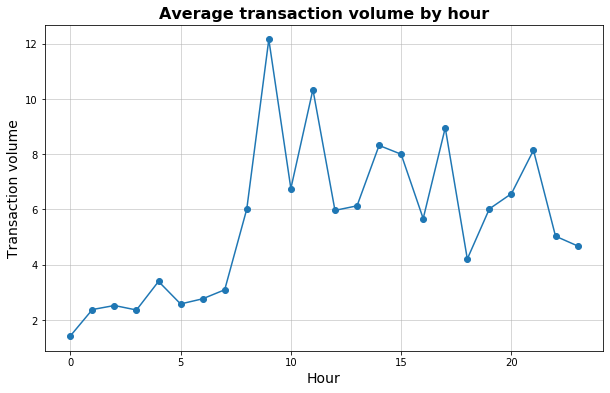

In [22]:
#group by date and then by hour 
vol_hour=vol_week.groupby(["date","hour"]).sum()

#plot the hour transaction of the customers
plt.figure(figsize=(10,6))
plt.plot(vol_hour.groupby("hour").mean()["count"].index,
    vol_hour.groupby("hour").mean()["count"], marker="o")

plt.title("Average transaction volume by hour",fontsize=16, fontweight='bold')
plt.ylabel("Transaction volume",fontsize=14)
plt.xlabel("Hour",fontsize=14)
plt.grid(True,linestyle='-', linewidth=0.5)

plt.show()

# Part 2

In [23]:
#create a data frame to store the customer's salary
#group by customer id and then by 
cust_info=anz.groupby(["customer_id","txn_description"],as_index=False).agg({'amount': [np.min,np.max]})
#pd.options.display.max_rows = None

#filter txn_description by PAY/SALARY
cust_info=cust_info[cust_info["txn_description"]=="PAY/SALARY"]
#calculate the difference between min and max and describe it
cust_info["dif"]=cust_info[('amount', 'amin')]-cust_info[('amount', 'amax')]
print(cust_info["dif"].describe())

#assign monthly salary to a variable
cust_info["salary"]=cust_info[('amount', 'amin')]
#delete other variables
del cust_info[('amount', 'amin')]
del cust_info[('amount', 'amax')]
del cust_info["dif"]
del cust_info["txn_description"]

cust_info.set_index("customer_id",inplace=True)
cust_info.head()

count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: dif, dtype: float64


,salary
,
customer_id,
CUS-1005756958,970.47
CUS-1117979751,3578.65
CUS-1140341822,1916.51
CUS-1147642491,1711.39
CUS-1196156254,3903.73


In [39]:
cust_info["salary"].describe()

count     100.00000
mean     2297.27390
std      1397.78397
min       576.00000
25%      1153.31000
50%      1949.43000
75%      2886.72500
max      8835.98000
Name: salary, dtype: float64

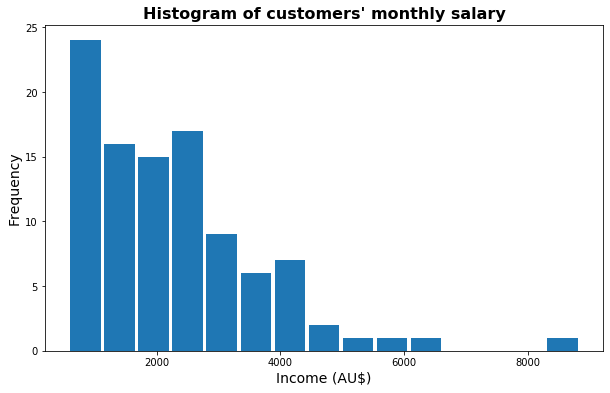

In [24]:
#plot a histogram of the monthly salary
plt.figure(figsize=(10,6))
plt.hist(cust_info["salary"],rwidth =0.9,bins=15)
plt.title("Histogram of customers' monthly salary",fontsize=16, fontweight='bold')
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Income (AU$)",fontsize=14)


plt.show()

In [25]:
anz_merch["large_amt"]=np.where(anz_merch["amount"]>60,1,0)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
ndates=anz["date"].nunique()

grouped=anz_merch[["customer_id","balance","gender","age","amount","date","large_amt"]]
grouped=grouped.groupby("customer_id").agg(
    {
        "balance":np.median,
        "gender":"first",
        "age":"first",
        "amount":[max,np.mean],
        "date":lambda x: len(x.unique()),
        "large_amt":sum
        
    }
)
#pd.concat([cust_info,info1,info2],axis=1,join="inner")

cust_info=pd.concat([cust_info,grouped],axis=1,join="inner")
cust_info


salary    balance gender   age   amount                date  \
                            median  first first      max       mean <lambda>   
customer_id                                                                    
CUS-1005756958   970.47   1054.965      F    53   226.82  37.726250       25   
CUS-1117979751  3578.65   8444.820      M    21  2885.85  76.458077       31   
CUS-1140341822  1916.51   6820.260      M    28  1271.46  67.531385       33   
CUS-1147642491  1711.39   9572.950      F    34   432.92  51.128289       39   
CUS-1196156254  3903.73  22055.110      F    34   390.67  30.310491       65   
...                 ...        ...    ...   ...      ...        ...      ...   
CUS-72755508     725.32   5194.250      F    35   228.06  34.545111       36   
CUS-809013380   1037.07   2853.165      F    21   377.79  27.297500       29   
CUS-860700529   1808.62   3893.730      M    30   378.76  29.044466       59   
CUS-880898248   1433.98   7948.915      M    26   671.23  28.903036       29   
CUS-883482547   3977.46   8404.430      F    19   258.96  30.884917       42   

               large_amt  
                     sum  
customer_id               
CUS-1005756958         6  
CUS-1117979751         2  
CUS-1140341822         8  
CUS-1147642491        12  
CUS-1196156254        15  
...                  ...  
CUS-72755508           7  
CUS-809013380          7  
CUS-860700529         16  
CUS-880898248          1  
CUS-883482547         10  

[100 rows x 8 columns]

In [27]:
cust_info.describe()

salary       balance         age       amount              \
                         median       first          max        mean   
count   100.00000     100.00000  100.000000   100.000000  100.000000   
mean   2297.27390   17398.68265   31.770000   754.094200   48.797409   
std    1397.78397   35628.97531   11.544254  1027.711536   33.723821   
min     576.00000    1054.96500   18.000000    17.950000   12.625000   
25%    1153.31000    4335.43625   22.000000   204.187500   30.572128   
50%    1949.43000    7167.14750   29.500000   398.025000   38.292905   
75%    2886.72500   12606.90250   39.250000   945.702500   55.486615   
max    8835.98000  265903.69000   78.000000  7081.090000  241.917778   

            date   large_amt  
        <lambda>         sum  
count  100.00000  100.000000  
mean    33.72000    7.980000  
std     17.63667    5.872346  
min      2.00000    0.000000  
25%     21.00000    4.000000  
50%     34.00000    7.000000  
75%     43.25000   11.000000  
max     82.00000   31.000000

In [28]:
cust_info.columns=cust_info.columns.droplevel(0)
cust_info.columns=["salary","med_bal","gender","age","max_amount","mean_amount","date","large_amt"]
cust_info


,salary,med_bal,gender,age,max_amount,mean_amount,date,large_amt
customer_id,,,,,,,,
CUS-1005756958,970.47,1054.965,F,53,226.82,37.726250,25,6
CUS-1117979751,3578.65,8444.820,M,21,2885.85,76.458077,31,2
CUS-1140341822,1916.51,6820.260,M,28,1271.46,67.531385,33,8
CUS-1147642491,1711.39,9572.950,F,34,432.92,51.128289,39,12
CUS-1196156254,3903.73,22055.110,F,34,390.67,30.310491,65,15
...,...,...,...,...,...,...,...,...
CUS-72755508,725.32,5194.250,F,35,228.06,34.545111,36,7
CUS-809013380,1037.07,2853.165,F,21,377.79,27.297500,29,7
CUS-860700529,1808.62,3893.730,M,30,378.76,29.044466,59,16


In [29]:
cust_info["avg_week_trans"]=round(7*ndates/cust_info["date"],0)
cust_info["age_below20"]=np.where(cust_info["age"]<20,1,0)
cust_info["age_btn20n40"]=np.where((cust_info["age"]>=20) & (cust_info["age"]<40),1,0)
cust_info["age_btn40n60"]=np.where((cust_info["age"]>=40) & (cust_info["age"]<60),1,0)
cust_info["gender_n"]=np.where(cust_info["gender"]=="M",1,0)

del cust_info["gender"]

cust_info


,salary,med_bal,age,max_amount,mean_amount,date,large_amt,avg_week_trans,age_below20,age_btn20n40,age_btn40n60,gender_n
customer_id,,,,,,,,,,,,
CUS-1005756958,970.47,1054.965,53,226.82,37.726250,25,6,25.0,0,0,1,0
CUS-1117979751,3578.65,8444.820,21,2885.85,76.458077,31,2,21.0,0,1,0,1
CUS-1140341822,1916.51,6820.260,28,1271.46,67.531385,33,8,19.0,0,1,0,1
CUS-1147642491,1711.39,9572.950,34,432.92,51.128289,39,12,16.0,0,1,0,0
CUS-1196156254,3903.73,22055.110,34,390.67,30.310491,65,15,10.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
CUS-72755508,725.32,5194.250,35,228.06,34.545111,36,7,18.0,0,1,0,0
CUS-809013380,1037.07,2853.165,21,377.79,27.297500,29,7,22.0,0,1,0,0
CUS-860700529,1808.62,3893.730,30,378.76,29.044466,59,16,11.0,0,1,0,1


In [30]:
anz_state=anz_merch.groupby(["customer_id","merchant_state"]).count()
idx=anz_state.groupby("customer_id")["status"].transform(max)== anz_state["status"]
anz_state=anz_state[idx]
anz_state=anz_state.reset_index()[["customer_id","merchant_state"]].set_index("customer_id")
anz_state=anz_state[~anz_state.index.duplicated(keep="first")]

In [31]:
cust_info=pd.concat([cust_info,anz_state],axis=1,join="inner")


In [32]:
cust_info["state_n"]= np.where(cust_info["merchant_state"]=="QLD",1,
        np.where(cust_info["merchant_state"]=="WA",2,
                np.where(cust_info["merchant_state"]=="VIC",3,
                        np.where(cust_info["merchant_state"]=="NSW",4,
                                np.where(cust_info["merchant_state"]=="SA",5,6))))
        )

del cust_info["merchant_state"]

cust_info

,salary,med_bal,age,max_amount,mean_amount,date,large_amt,avg_week_trans,age_below20,age_btn20n40,age_btn40n60,gender_n,state_n
customer_id,,,,,,,,,,,,,
CUS-1005756958,970.47,1054.965,53,226.82,37.726250,25,6,25.0,0,0,1,0,1
CUS-1117979751,3578.65,8444.820,21,2885.85,76.458077,31,2,21.0,0,1,0,1,2
CUS-1140341822,1916.51,6820.260,28,1271.46,67.531385,33,8,19.0,0,1,0,1,3
CUS-1147642491,1711.39,9572.950,34,432.92,51.128289,39,12,16.0,0,1,0,0,4
CUS-1196156254,3903.73,22055.110,34,390.67,30.310491,65,15,10.0,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS-72755508,725.32,5194.250,35,228.06,34.545111,36,7,18.0,0,1,0,0,4
CUS-809013380,1037.07,2853.165,21,377.79,27.297500,29,7,22.0,0,1,0,0,4
CUS-860700529,1808.62,3893.730,30,378.76,29.044466,59,16,11.0,0,1,0,1,1


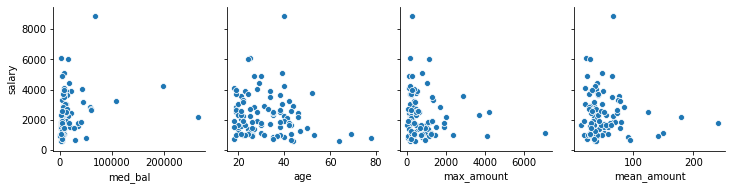

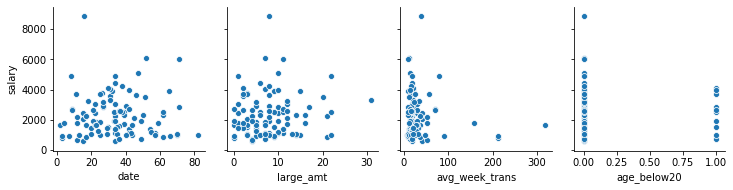

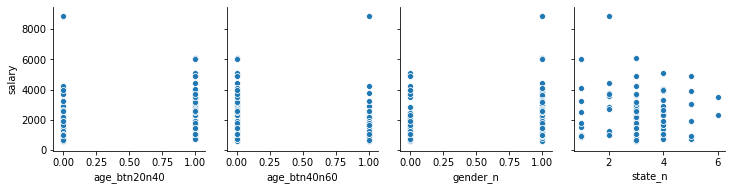

In [38]:
#numerc=["salary","med_bal","age","max_amount","mean_amount","date","avg_week_trans"]
#categ=["gender","age_below20","age_btn20n40","age_btn40n60","merchant_state"]

for i in range(1, len(cust_info.columns),4):
    sns.pairplot(data=cust_info,
                x_vars=cust_info.columns[i:i+4],
                y_vars=['salary']) 

In [34]:
individual_features_df = []
for i in range(1, len(cust_info.columns)): # -1 because the last column is SalePrice
    tmpDf = cust_info[[cust_info.columns[i], 'salary']]
    #tmpDf = tmpDf[tmpDf[cust_info.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['salary'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

            age: -0.13526387125427686
     max_amount: -0.12829004635892247
 avg_week_trans: -0.1207282682666346
    mean_amount: -0.052475169390817825
        state_n: -0.047110387788419805
   age_btn40n60: -0.005005616543523841
           date: 0.011900659019506599
   age_btn20n40: 0.04135103645671174
    age_below20: 0.048788321980626825
      large_amt: 0.09529658617906242
       gender_n: 0.15411311749749124
        med_bal: 0.2074148672112864


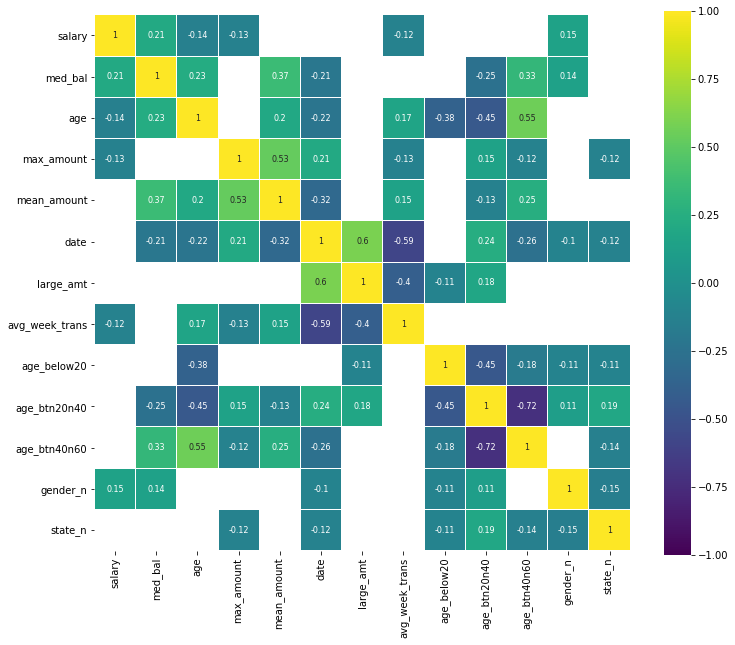

In [41]:
corr = cust_info.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [36]:
y_model=cust_info["salary"].values.reshape(-1,1)
x_model1=cust_info[cust_info.columns[~cust_info.columns.isin(["salary"])]].values.reshape(-1,12)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_model1, y_model)  # perform linear regression
y_pred_1 = linear_regressor.predict(x_model1)  # make predictions'''

print(f"First model using all variables has a R^2 of {linear_regressor.score(x_model1, y_model):,.3f}")
print(f"MSE of {mean_squared_error(y_model, y_pred_1):,.0f}")


First model using all variables has a R^2 of 0.155
MSE of 1,634,256


In [40]:
x_model2=cust_info[["age","max_amount","avg_week_trans","gender_n","med_bal"]].values

linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(x_model2, y_model)  # perform linear regression
y_pred_2 = linear_regressor2.predict(x_model2)  # make predictions'''

print(f"Second model using the variables 'age', 'maximum amount', 'average week transactions', 'gender' and 'medium balance' has a R^2 of {linear_regressor2.score(x_model2, y_model):,.3f}")
print(f"MSE of {mean_squared_error(y_model, y_pred_2):,.0f}")

Second model using the variables 'age', 'maximum amount', 'average week transactions', 'gender' and 'medium balance' has a R^2 of 0.129
MSE of 1,684,761
